In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../archive/austin_bikeshare_trips.csv")
df.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              648508 non-null  float64
 1   checkout_time       649231 non-null  object 
 2   duration_minutes    649231 non-null  int64  
 3   end_station_id      629389 non-null  float64
 4   end_station_name    649231 non-null  object 
 5   month               618479 non-null  float64
 6   start_station_id    630190 non-null  float64
 7   start_station_name  649231 non-null  object 
 8   start_time          649231 non-null  object 
 9   subscriber_type     647154 non-null  object 
 10  trip_id             649231 non-null  int64  
 11  year                618479 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 59.4+ MB


In [4]:
df.shape

(649231, 12)

In [5]:
df.duplicated().value_counts()

False    649231
dtype: int64

No duplicated data.

In [6]:
df.describe()

,bikeid,duration_minutes,end_station_id,month,start_station_id,trip_id,year
count,648508.000000,649231.000000,629389.000000,618479.000000,630190.000000,6.492310e+05,618479.000000
mean,471.615214,29.127506,2582.470617,5.887185,2584.238288,5.384945e+09,2015.340026
std,323.588379,87.278642,319.898534,3.206358,320.840964,4.925349e+09,1.019771
min,3.000000,0.000000,1001.000000,1.000000,1001.000000,8.269930e+06,2013.000000
25%,208.000000,8.000000,2499.000000,3.000000,2501.000000,1.274709e+07,2014.000000
50%,417.000000,15.000000,2548.000000,5.000000,2549.000000,9.900028e+09,2015.000000
75%,745.000000,28.000000,2571.000000,9.000000,2571.000000,9.900190e+09,2016.000000
max,5089.000000,21296.000000,3687.000000,12.000000,3687.000000,9.900353e+09,2017.000000


Average duration of the trip is about 29.13 mins. The longest trip was 21296 mins, equal to 14.79 days. 

In [7]:
df.loc[df['duration_minutes'] == 21296]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
15669,19.0,17:12:35,21296,NaN,Stolen,1.0,2711.0,Barton Springs @ Kinney Ave,2016-01-07 17:12:35,Walk Up,9900012849,2016.0


In [8]:
stolen_bike = df.loc[df['end_station_name'] == 'Stolen']
stolen_bike

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
15669,19.0,17:12:35,21296,NaN,Stolen,1.0,2711.0,Barton Springs @ Kinney Ave,2016-01-07 17:12:35,Walk Up,9900012849,2016.0
31609,122.0,9:00:56,5974,NaN,Stolen,9.0,2565.0,Trinity & 6th Street,2016-09-02 09:00:56,Walk Up,11714202,2016.0
45148,8.0,20:12:00,13981,NaN,Stolen,12.0,2566.0,Pfluger Bridge @ W 2nd Street,2015-12-17 20:12:00,Walk Up,9900348283,2015.0
100999,545.0,3:12:40,7902,NaN,Stolen,11.0,2565.0,Trinity & 6th Street,2015-11-25 03:12:40,Walk Up,9900333086,2015.0
102282,384.0,9:12:36,2950,NaN,Stolen,11.0,2498.0,Convention Center / 4th St. @ MetroRail,2015-11-20 09:12:36,Walk Up,9900331256,2015.0
142018,54.0,21:12:31,3624,NaN,Stolen,11.0,2540.0,17th & Guadalupe,2015-11-09 21:12:31,Walk Up,9900326374,2015.0
168955,393.0,4:57:28,4833,NaN,Stolen,1.0,2561.0,State Capitol Visitors Garage @ San Jacinto & ...,2017-01-28 04:57:28,Walk Up,13564817,2017.0
352428,578.0,1:35:26,5189,NaN,Stolen,1.0,2498.0,Convention Center / 4th St. @ MetroRail,2017-01-27 01:35:26,Walk Up,13555129,2017.0
391694,127.0,19:12:38,3632,NaN,Stolen,10.0,2574.0,Zilker Park,2015-10-10 19:12:38,Walk Up,9900298869,2015.0
426644,327.0,6:37:15,6118,NaN,Stolen,9.0,2565.0,Trinity & 6th Street,2016-09-02 06:37:15,Walk Up,11712091,2016.0


In [9]:
col = ['bikeid', 'month', 'start_station_id', 'year']
stolen_bike[col] = stolen_bike[col].astype('int64')

stolen_bike.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
15669,19,17:12:35,21296,NaN,Stolen,1,2711,Barton Springs @ Kinney Ave,2016-01-07 17:12:35,Walk Up,9900012849,2016
31609,122,9:00:56,5974,NaN,Stolen,9,2565,Trinity & 6th Street,2016-09-02 09:00:56,Walk Up,11714202,2016
45148,8,20:12:00,13981,NaN,Stolen,12,2566,Pfluger Bridge @ W 2nd Street,2015-12-17 20:12:00,Walk Up,9900348283,2015
100999,545,3:12:40,7902,NaN,Stolen,11,2565,Trinity & 6th Street,2015-11-25 03:12:40,Walk Up,9900333086,2015
102282,384,9:12:36,2950,NaN,Stolen,11,2498,Convention Center / 4th St. @ MetroRail,2015-11-20 09:12:36,Walk Up,9900331256,2015


In [10]:
stolen_bike['end_station_name'].value_counts()

Stolen    15
Name: end_station_name, dtype: int64

In [11]:
stolen_bike['year'].value_counts()

2015    9
2016    3
2017    3
Name: year, dtype: int64

In [12]:
stolen_bike.year.value_counts(normalize = True) * 100

2015    60.0
2016    20.0
2017    20.0
Name: year, dtype: float64

In [13]:
stolen_bike['start_station_name'].value_counts()

Trinity & 6th Street                                  4
Pfluger Bridge @ W 2nd Street                         2
Convention Center / 4th St. @ MetroRail               2
Barton Springs @ Kinney Ave                           1
17th & Guadalupe                                      1
State Capitol Visitors Garage @ San Jacinto & 12th    1
Zilker Park                                           1
Toomey Rd @ South Lamar                               1
8th & Congress                                        1
2nd & Congress                                        1
Name: start_station_name, dtype: int64

Text(0.5, 1.0, 'Number of stolen bikes by start station')

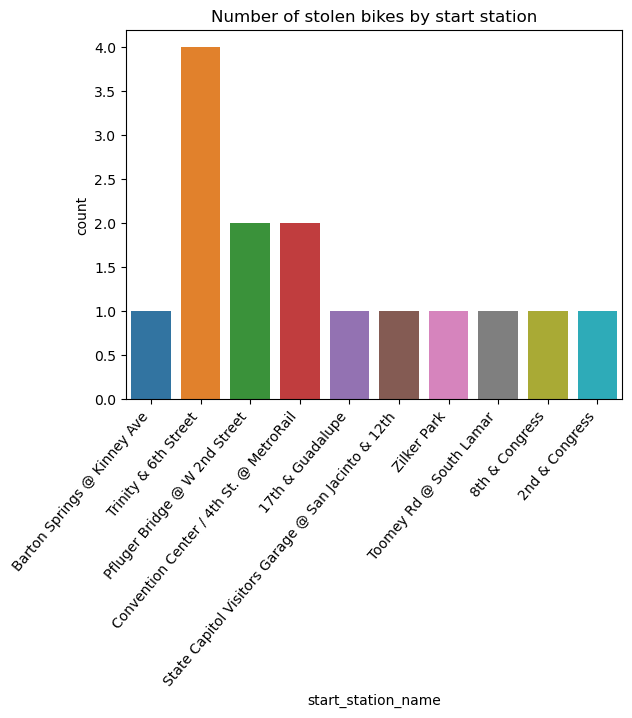

In [14]:
figure_1 = sns.countplot(data = stolen_bike, x = 'start_station_name')
plt.xticks(
    rotation= 50, 
    horizontalalignment='right', 
)
plt.title("Number of stolen bikes by start station")

There are 15 bikes stolen, mostly at Trinity & 6th Street (4 bikes stolen). Mostly happened in 2015 (9 bikes stolen). 

Cases of stolen bikes decreases from 60% to 20% in 2016 and 20% in 2017. Might be because of increased security deployed.  

(-1.11299283251233,
 1.1006187477307658,
 -1.1177383011956805,
 1.1138080494567117)

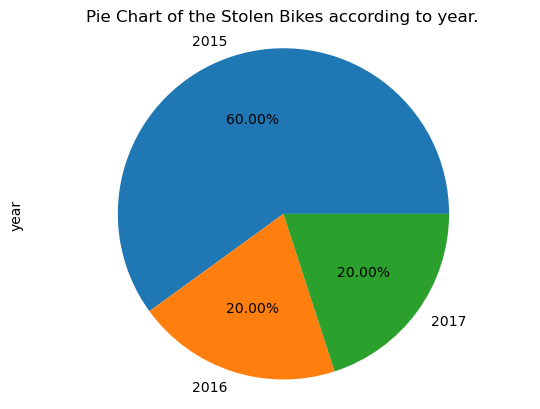

In [15]:
stolen_bike.year.value_counts().plot.pie(autopct='%1.2f%%',
                                     title = "Pie Chart of the Stolen Bikes according to year.")
plt.axis('equal')


In [16]:
#15 stolen bikes, 649231 rows
percentage_of_stolen_bikes = (15 / 649231) * 100

print ("Percentage of missing bike is:", percentage_of_stolen_bikes, "%")

Percentage of missing bike is: 0.0023104257190429906 %


To exclude the stolen bikes data. 

In [17]:
trips_data = df[df.end_station_name != 'Stolen']
trips_data.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [18]:
trips_data.loc[trips_data['end_station_name'] == 'Stolen']

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year


In [19]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649216 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              648493 non-null  float64
 1   checkout_time       649216 non-null  object 
 2   duration_minutes    649216 non-null  int64  
 3   end_station_id      629389 non-null  float64
 4   end_station_name    649216 non-null  object 
 5   month               618464 non-null  float64
 6   start_station_id    630175 non-null  float64
 7   start_station_name  649216 non-null  object 
 8   start_time          649216 non-null  object 
 9   subscriber_type     647139 non-null  object 
 10  trip_id             649216 non-null  int64  
 11  year                618464 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 64.4+ MB


In [20]:
trips_data.describe()

,bikeid,duration_minutes,end_station_id,month,start_station_id,trip_id,year
count,648493.000000,649216.000000,629389.000000,618464.000000,630175.000000,6.492160e+05,618464.000000
mean,471.619236,28.987077,2582.470617,5.887135,2584.238745,5.384917e+09,2015.340020
std,323.588725,78.492636,319.898534,3.206316,320.844614,4.925352e+09,1.019775
min,3.000000,0.000000,1001.000000,1.000000,1001.000000,8.269930e+06,2013.000000
25%,208.000000,8.000000,2499.000000,3.000000,2501.000000,1.274704e+07,2014.000000
50%,417.000000,15.000000,2548.000000,5.000000,2549.000000,9.900028e+09,2015.000000
75%,745.000000,28.000000,2571.000000,9.000000,2571.000000,9.900190e+09,2016.000000
max,5089.000000,10981.000000,3687.000000,12.000000,3687.000000,9.900353e+09,2017.000000


Excluding the stolen bikes, the average duration of the trips is 28.98 minutes. The longest trip was 10981 minutes. (7.63 days) 

Outliers could exist in the dataset.

In [21]:
column = ['duration_minutes', 'month', 'year']

trips_data[column].mean()

duration_minutes      28.987077
month                  5.887135
year                2015.340020
dtype: float64

In [22]:
trips_data[column].median()

duration_minutes      15.0
month                  5.0
year                2015.0
dtype: float64

In [23]:
trips_data[column].mode()

,duration_minutes,month,year
0,7,3.0,2016.0


In [24]:
trips_data.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19827
end_station_name          0
month                 30752
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                  30752
dtype: int64

In [25]:
trips_data.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [26]:
trips_data['year'] = trips_data['start_time'].str[0:4]
trips_data['year'] = trips_data['year'].astype('int64')
trips_data['year']

0         2015
1         2016
2         2016
3         2014
4         2017
          ... 
649226    2014
649227    2017
649228    2015
649229    2016
649230    2015
Name: year, Length: 649216, dtype: int64

In [27]:
trips_data['month'] = trips_data['start_time'].str[5:7]
trips_data['month'] = trips_data['month'].astype('int64')
trips_data['month']

0          3
1         10
2          3
3         11
4          4
          ..
649226     7
649227     2
649228    11
649229     5
649230    12
Name: month, Length: 649216, dtype: int64

In [28]:
trips_data.dtypes

bikeid                float64
checkout_time          object
duration_minutes        int64
end_station_id        float64
end_station_name       object
month                   int64
start_station_id      float64
start_station_name     object
start_time             object
subscriber_type        object
trip_id                 int64
year                    int64
dtype: object

In [29]:
trips_data.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19827
end_station_name          0
month                     0
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                      0
dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

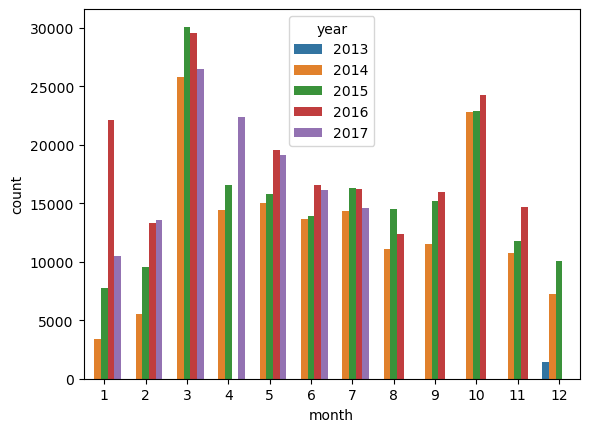

In [30]:
sns.countplot(data = trips_data, x = 'month', hue = 'year')

There is only data for December in 2013. For year 2016, the data during April and December are missing. For year 2017, the data is only available up from January to July. 

March is the busiest month for all year. It seems like bike is popular in March and October. 

<AxesSubplot:xlabel='year', ylabel='count'>

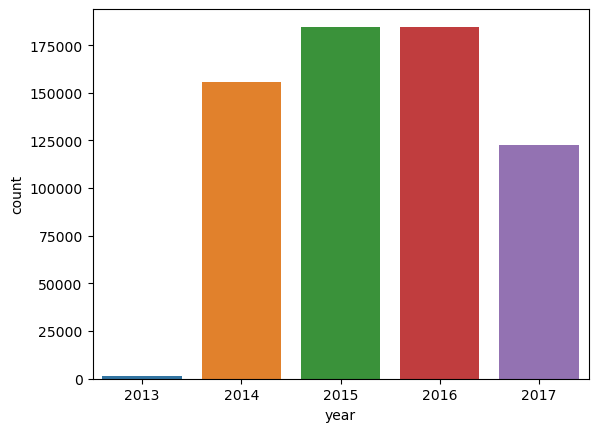

In [31]:
sns.countplot(data = trips_data, x = 'year')

Data in 2013 is mostly missing. Only some data is available in 2014 and 2017. 

In [32]:
trips_data.year.value_counts()

2016    184677
2015    184512
2014    155703
2017    122867
2013      1457
Name: year, dtype: int64

In [33]:
trips_data.year.value_counts(normalize = True) * 100

2016    28.446157
2015    28.420741
2014    23.983235
2017    18.925442
2013     0.224425
Name: year, dtype: float64

(-1.1022313118485008,
 1.1001062529451666,
 -1.1261714399350622,
 1.110445202104294)

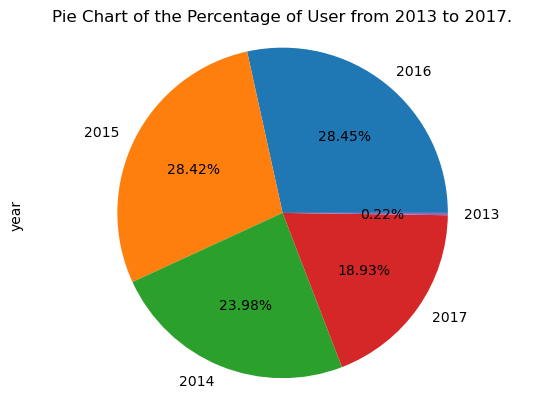

In [34]:
trips_data.year.value_counts().plot.pie(autopct='%1.2f%%',
                                     title = "Pie Chart of the Percentage of User from 2013 to 2017.")
plt.axis('equal')


In [35]:
trips_data.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017


In [36]:
trips_data.shape

(649216, 12)

In [37]:
missing_bikeid = trips_data['bikeid'].isnull().sum()

percentage_missing_bikeid = (missing_bikeid / 649216 ) * 100

print("Percentage of missing values for bikeid : {:.2f}".format(percentage_missing_bikeid), '%')

Percentage of missing values for bikeid : 0.11 %


In [38]:
missing_end_station_id = trips_data['end_station_id'].isnull().sum()

percentage_missing_end_station_id = (missing_end_station_id / 649216 ) * 100

print("Percentage of missing values for end_station_id : {:.2f}".format(percentage_missing_end_station_id), '%')

Percentage of missing values for end_station_id : 3.05 %


In [39]:
missing_start_station_id  = trips_data['start_station_id'].isnull().sum()

percentage_missing_start_station_id  = (missing_start_station_id  / 649216 ) * 100

print("Percentage of missing values for start_station_id  : {:.2f}".format(percentage_missing_start_station_id ), '%')

Percentage of missing values for start_station_id  : 2.93 %


In [40]:
missing_subscriber_type  = trips_data['subscriber_type'].isnull().sum()

percentage_missing_subscriber_type  = (missing_subscriber_type  / 649216 ) * 100

print("Percentage of missing values for subscriber_type  : {:.2f}".format(percentage_missing_subscriber_type ), '%')

Percentage of missing values for subscriber_type  : 0.32 %


The percentages of missing values according to columns are as above.

In [41]:
trips_data.isnull().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19827
end_station_name          0
month                     0
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                      0
dtype: int64

In [42]:
trips_data = trips_data.dropna()

In [43]:
print (trips_data.shape)

trips_data.isnull().sum()

#From having 649216 rows to 612351 rows

(612351, 12)


bikeid                0
checkout_time         0
duration_minutes      0
end_station_id        0
end_station_name      0
month                 0
start_station_id      0
start_station_name    0
start_time            0
subscriber_type       0
trip_id               0
year                  0
dtype: int64

In [44]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612351 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              612351 non-null  float64
 1   checkout_time       612351 non-null  object 
 2   duration_minutes    612351 non-null  int64  
 3   end_station_id      612351 non-null  float64
 4   end_station_name    612351 non-null  object 
 5   month               612351 non-null  int64  
 6   start_station_id    612351 non-null  float64
 7   start_station_name  612351 non-null  object 
 8   start_time          612351 non-null  object 
 9   subscriber_type     612351 non-null  object 
 10  trip_id             612351 non-null  int64  
 11  year                612351 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 60.7+ MB


In [45]:
col = ['bikeid', 'end_station_id', 'start_station_id']

trips_data[col] = trips_data[col].astype('int64')

trips_data.dtypes

bikeid                 int64
checkout_time         object
duration_minutes       int64
end_station_id         int64
end_station_name      object
month                  int64
start_station_id       int64
start_station_name    object
start_time            object
subscriber_type       object
trip_id                int64
year                   int64
dtype: object

In [46]:
trips_data.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8,19:12:00,41,2565,Trinity & 6th Street,3,2536,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015
1,141,2:06:04,6,2570,South Congress & Academy,10,2494,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016
2,578,16:28:27,13,2498,Convention Center / 4th St. @ MetroRail,3,2538,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016
3,555,15:12:00,80,2712,Toomey Rd @ South Lamar,11,2497,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014
4,86,15:39:13,25,3377,MoPac Pedestrian Bridge @ Veterans Drive,4,2707,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017


In [47]:
trips_data.describe(include = 'object')

,checkout_time,end_station_name,start_station_name,start_time,subscriber_type
count,612351,612351,612351,612351,612351
unique,65613,71,72,354412,51
top,16:12:00,City Hall / Lavaca & 2nd,City Hall / Lavaca & 2nd,2015-03-19 18:12:00,Walk Up
freq,21339,32223,27661,284,271535


In [48]:
trips_data.describe()

,bikeid,duration_minutes,end_station_id,month,start_station_id,trip_id,year
count,612351.000000,612351.000000,612351.000000,612351.000000,612351.000000,6.123510e+05,612351.000000
mean,472.731564,28.514553,2582.953594,5.891144,2585.038161,5.150235e+09,2015.472683
std,324.448308,70.219251,322.462247,3.146559,323.034456,4.940173e+09,1.046066
min,3.000000,0.000000,1001.000000,1.000000,1001.000000,8.269930e+06,2013.000000
25%,209.000000,8.000000,2499.000000,3.000000,2501.000000,1.250602e+07,2015.000000
50%,420.000000,14.000000,2548.000000,6.000000,2549.000000,9.900013e+09,2015.000000
75%,745.000000,27.000000,2571.000000,9.000000,2571.000000,9.900183e+09,2016.000000
max,5089.000000,10981.000000,3687.000000,12.000000,3687.000000,9.900353e+09,2017.000000


Text(0.5, 1.0, 'Common start station')

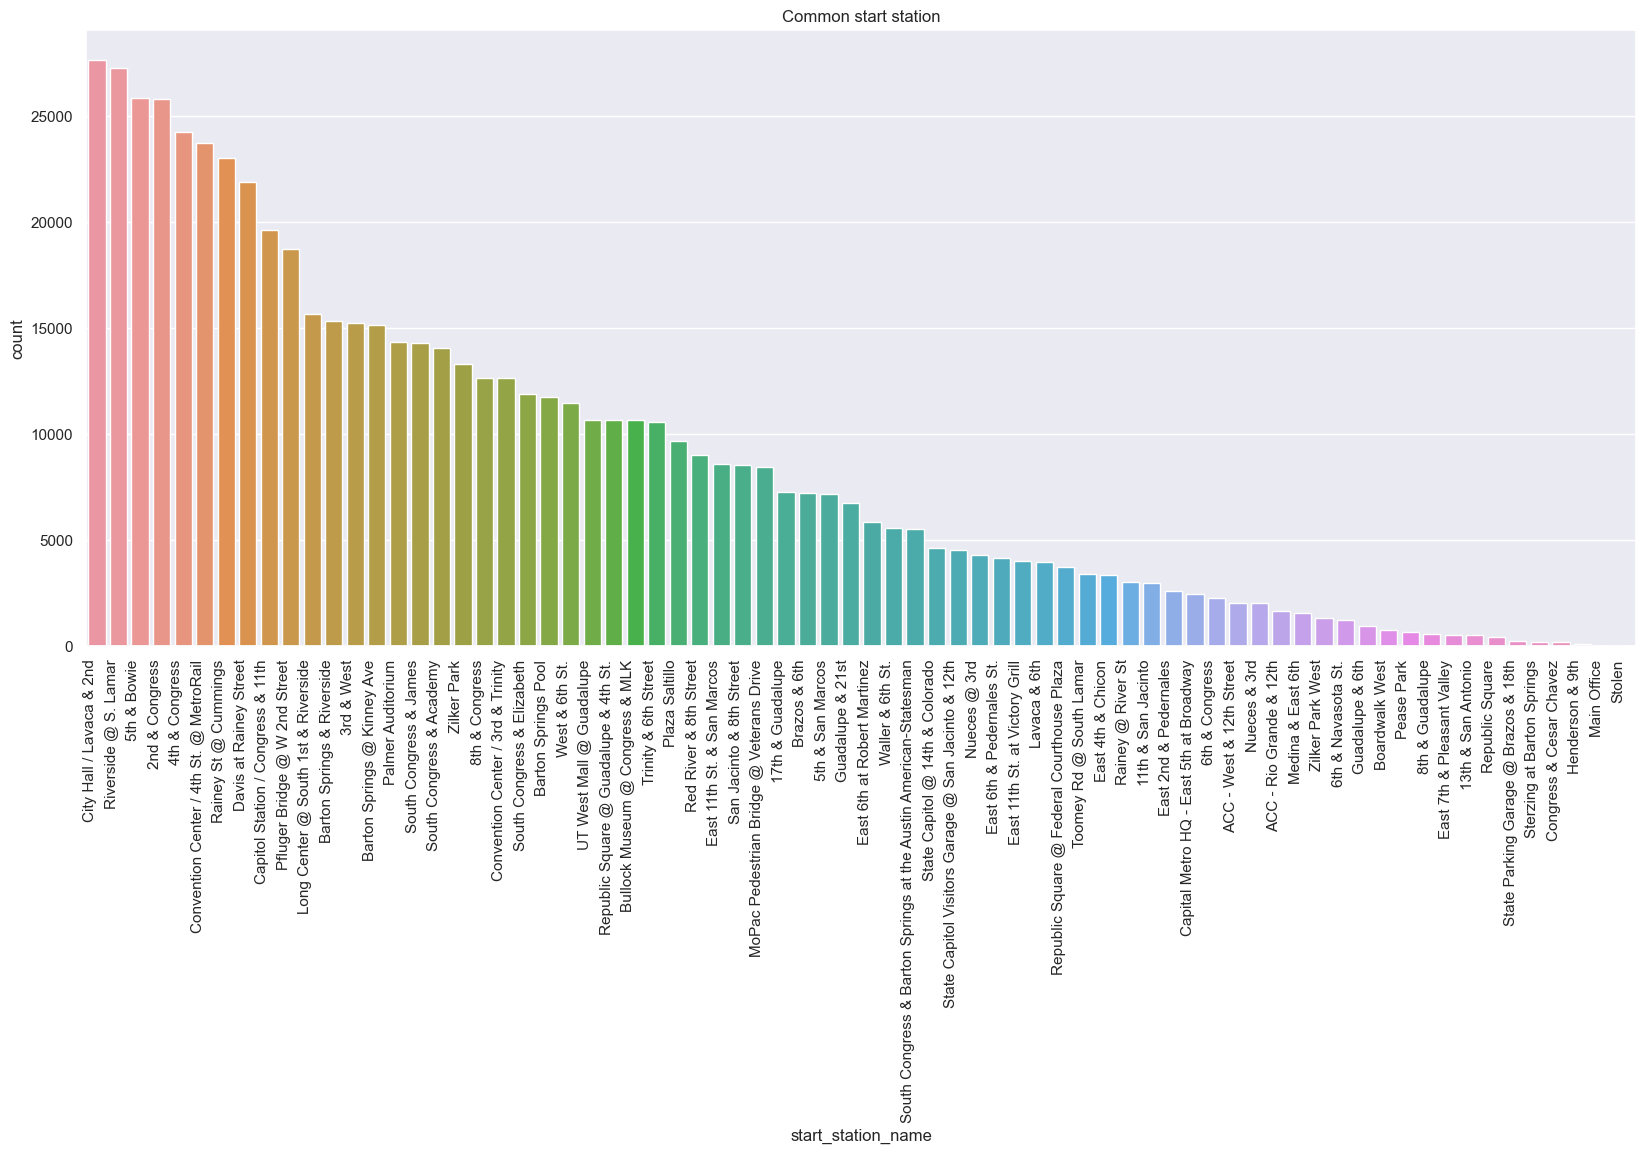

In [50]:
sns.countplot(x='start_station_name', data=trips_data, order = trips_data['start_station_name'].value_counts().index)

sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(
    rotation= 90, 
    horizontalalignment='right', 
)
plt.title("Common start station")

In [51]:
trips_data.start_station_name.value_counts().head(10)

City Hall / Lavaca & 2nd                   27661
Riverside @ S. Lamar                       27252
5th & Bowie                                25857
2nd & Congress                             25787
4th & Congress                             24257
Convention Center / 4th St. @ MetroRail    23747
Rainey St @ Cummings                       23007
Davis at Rainey Street                     21865
Capitol Station / Congress & 11th          19638
Pfluger Bridge @ W 2nd Street              18716
Name: start_station_name, dtype: int64

Text(0.5, 1.0, 'Common end station')

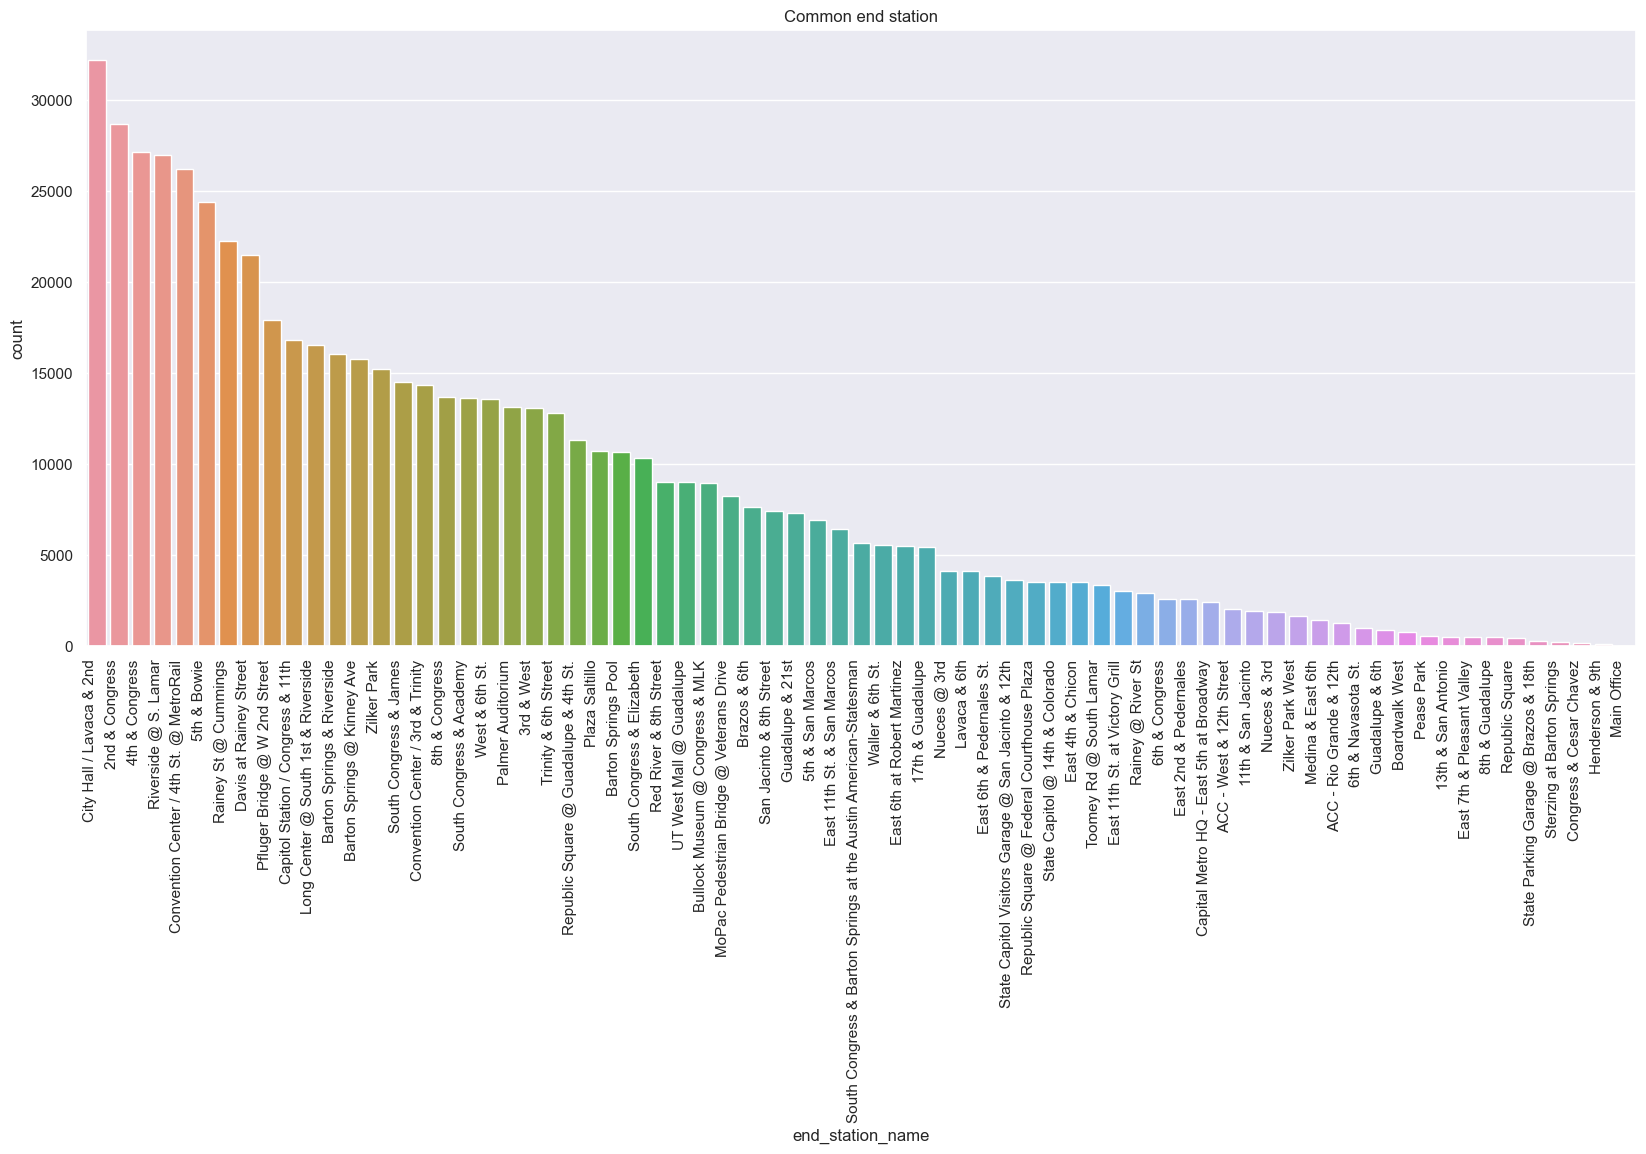

In [52]:
sns.countplot(x='end_station_name', data=trips_data, order = trips_data['end_station_name'].value_counts().index)

sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(
    rotation= 90, 
    horizontalalignment='right', 
)
plt.title("Common end station")

In [53]:
trips_data.end_station_name.value_counts().head(10)

City Hall / Lavaca & 2nd                   32223
2nd & Congress                             28667
4th & Congress                             27169
Riverside @ S. Lamar                       26991
Convention Center / 4th St. @ MetroRail    26216
5th & Bowie                                24425
Rainey St @ Cummings                       22265
Davis at Rainey Street                     21490
Pfluger Bridge @ W 2nd Street              17923
Capitol Station / Congress & 11th          16792
Name: end_station_name, dtype: int64

Top 10 for most start and end stations are basically similar. These stations should maintain the facility to accommodate the users better, especially during March and October. The surge of users in March and October might be because of the changes of the season in Austin. The great weather greatly accommodate visitors to come visit Austin, so it is a great idea to supply more bikes during these months. 

In [54]:
trips_data.subscriber_type.value_counts().head(5)

Walk Up                               271535
Local365                              124956
24-Hour Kiosk (Austin B-cycle)         91201
Local30                                36604
Annual Membership (Austin B-cycle)     27895
Name: subscriber_type, dtype: int64

Text(0.5, 1.0, 'Type of subcribers')

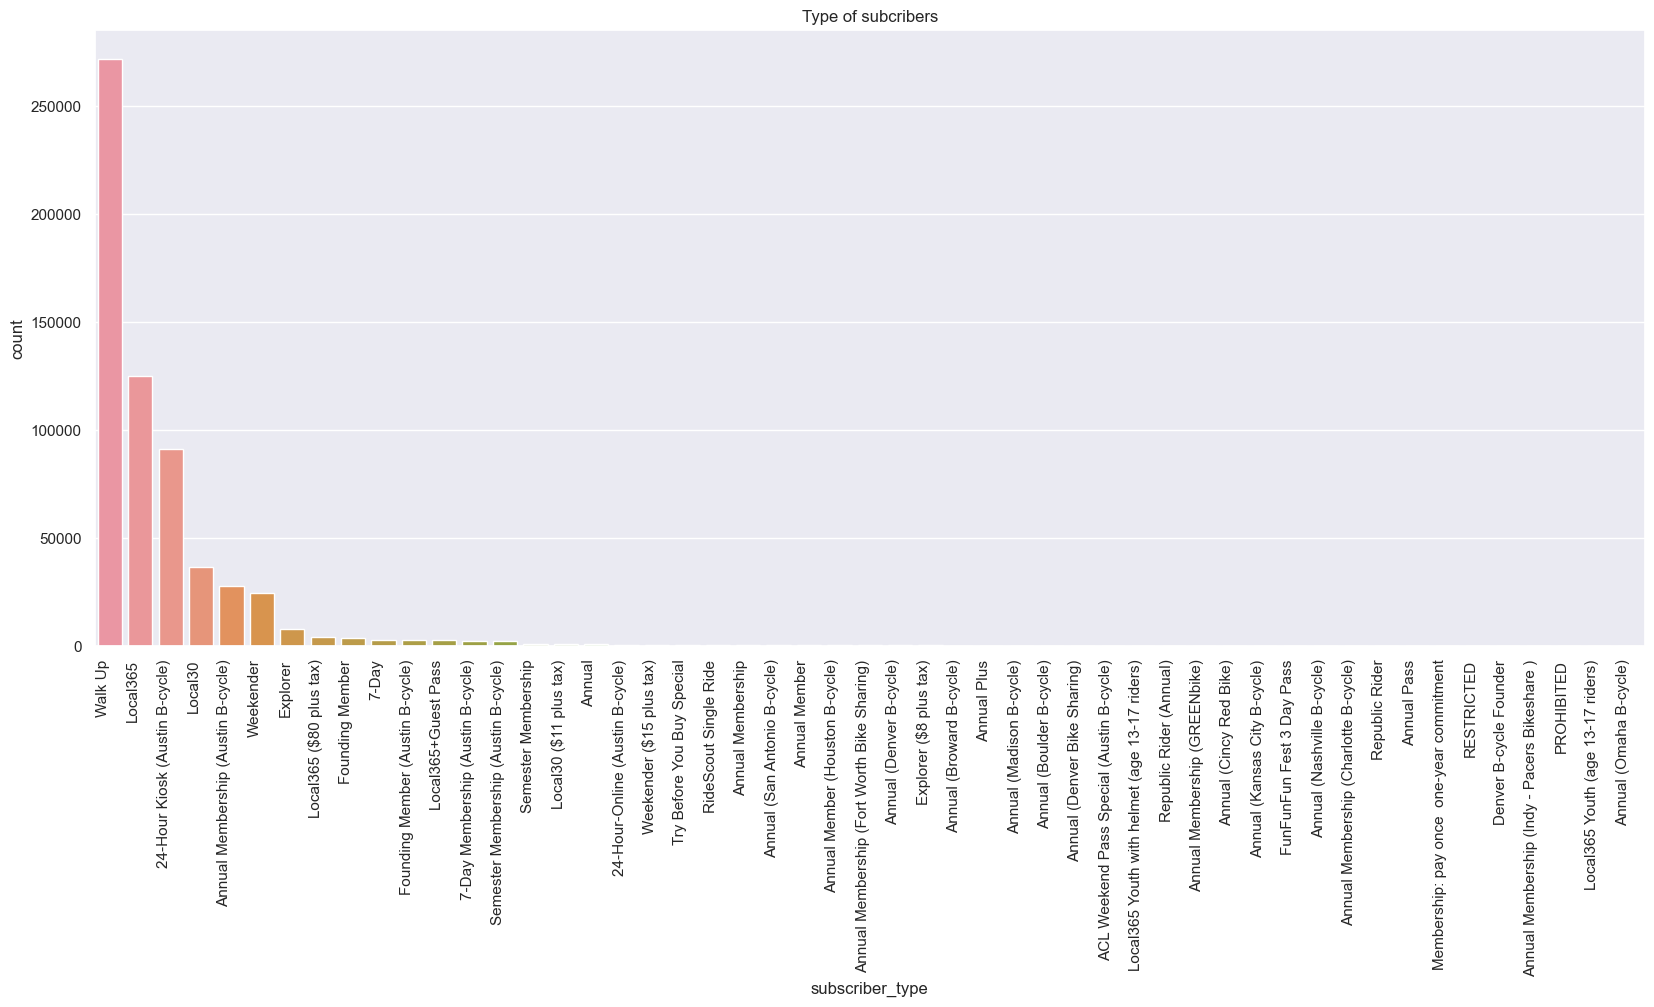

In [55]:
sns.countplot(x='subscriber_type', data=trips_data, order = trips_data['subscriber_type'].value_counts().index)

sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(
    rotation= 90, 
    horizontalalignment='right', 
)
plt.title("Type of subcribers")

In [57]:
trips_data.year.value_counts(normalize = True) * 100

2016    30.129452
2015    28.096468
2014    21.819185
2017    19.716960
2013     0.237935
Name: year, dtype: float64

(-1.1087080096224282,
 1.1004146671248776,
 -1.1238169761541368,
 1.1141897239152707)

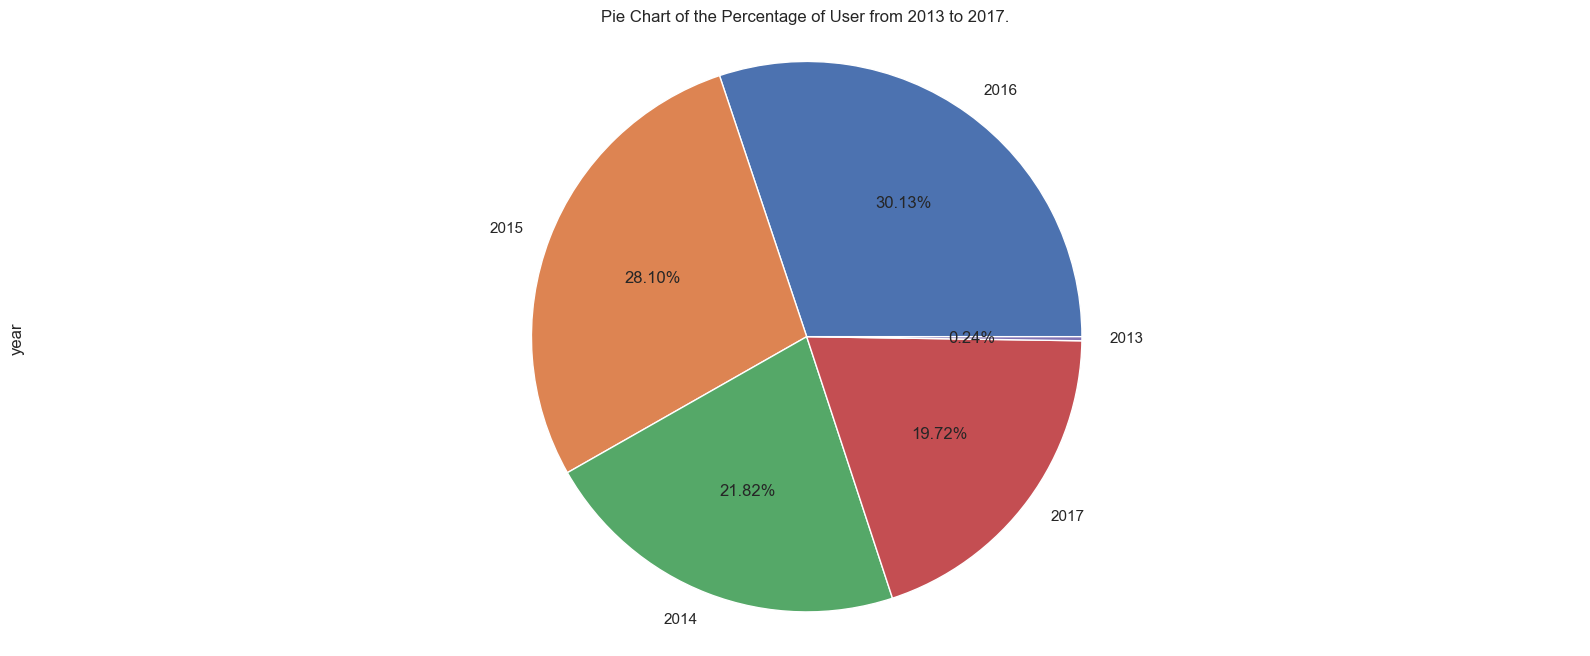

In [58]:
trips_data.year.value_counts().plot.pie(autopct='%1.2f%%',
                                     title = "Pie Chart of the Percentage of User from 2013 to 2017.")
plt.axis('equal')


<AxesSubplot:>

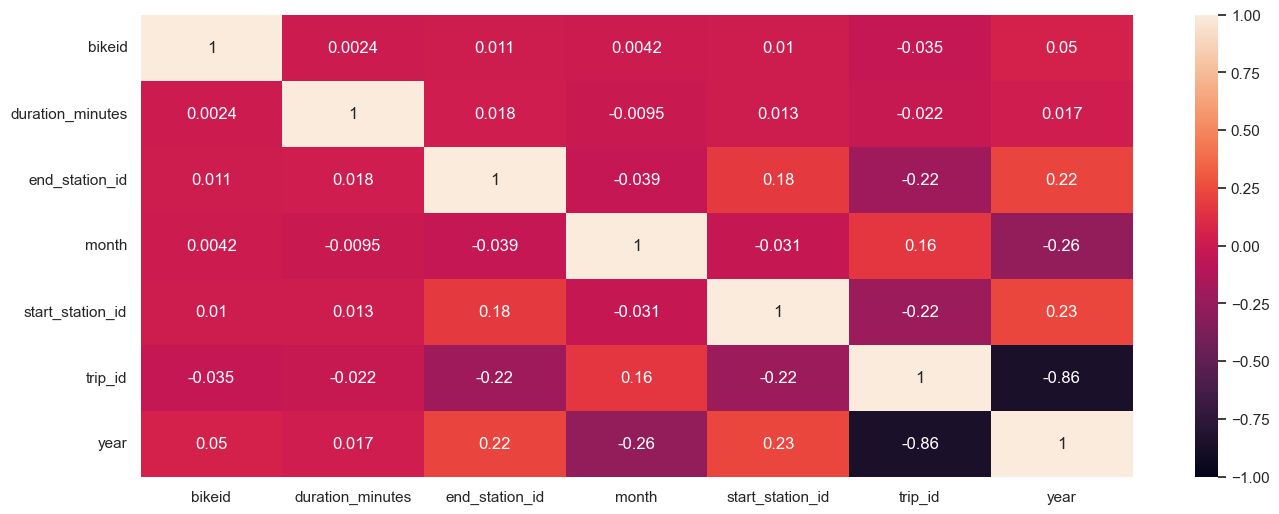

In [59]:
plt.figure(figsize=(16, 6))
sns.heatmap(trips_data.corr(), vmin=-1, vmax=1, annot=True)

In [56]:
trips_data.describe()

,bikeid,duration_minutes,end_station_id,month,start_station_id,trip_id,year
count,612351.000000,612351.000000,612351.000000,612351.000000,612351.000000,6.123510e+05,612351.000000
mean,472.731564,28.514553,2582.953594,5.891144,2585.038161,5.150235e+09,2015.472683
std,324.448308,70.219251,322.462247,3.146559,323.034456,4.940173e+09,1.046066
min,3.000000,0.000000,1001.000000,1.000000,1001.000000,8.269930e+06,2013.000000
25%,209.000000,8.000000,2499.000000,3.000000,2501.000000,1.250602e+07,2015.000000
50%,420.000000,14.000000,2548.000000,6.000000,2549.000000,9.900013e+09,2015.000000
75%,745.000000,27.000000,2571.000000,9.000000,2571.000000,9.900183e+09,2016.000000
max,5089.000000,10981.000000,3687.000000,12.000000,3687.000000,9.900353e+09,2017.000000


After dropping null value. 

1) The average duration for the trips is 28.51 minutes. 
2) The busiest months are March and October. 
3) There is a total of 15 bikes stolen from year 2015 to 2017. Mainly happened in Trinity & 6th Street. Year 2015 had the most number of bikes getting stolen.  
4) Year 2016 having the most bike users with 30.12% and followed closedly by year 2015 at 28.10%. 
5) Year 2013 having the least bike users at 0.23% due to unavailable data. 

In [60]:
trips_data.to_csv('eda_bikeshare_trips.csv')